#**DEEP LEARNING - MIGUEL MARINES**
##**<u>Text Classification Using RNNs and AG_NEWS Dataset in PyTorch</u>**
---
---

**Content:**
- Defining, training, and evaluating a text classification model in PyTorch.
  - Environment
  - Libraries
  - Device
  - Data Loading
  - Tokens
  - Vocabulary
  - Data Splitting
  - Data Loaders
  - Model
  - RNN Model / LSTM
  - Training
  - Testing
  - Predictions
---

Dataset:
https://paperswithcode.com/dataset/ag-news


##**Environment**

To ensure compatibility with the notebook and avoid potential issues with package versions, any existing versions of PyTorch-related libraries are uninstall and specific versions are installed.

In [1]:
!pip uninstall -y torch torchtext torchvision torchaudio torchsummary

Found existing installation: torch 2.5.0+cu121
Uninstalling torch-2.5.0+cu121:
  Successfully uninstalled torch-2.5.0+cu121
Found existing installation: torchvision 0.20.0+cu121
Uninstalling torchvision-0.20.0+cu121:
  Successfully uninstalled torchvision-0.20.0+cu121
Found existing installation: torchaudio 2.5.0+cu121
Uninstalling torchaudio-2.5.0+cu121:
  Successfully uninstalled torchaudio-2.5.0+cu121
Found existing installation: torchsummary 1.5.1
Uninstalling torchsummary-1.5.1:
  Successfully uninstalled torchsummary-1.5.1


In [2]:
!pip install torch==2.0.0 torchtext==0.15.1 torchvision==0.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [3]:
!pip install portalocker

###**Libraries**

Below are the libraries required for this activity, categorized by their functionality. Each library serves a specific purpose in preparing, training, and evaluating the text classification model.


In [4]:
# Numerical Operations
import numpy as np                                         # Numerical operations and array handling.

# PyTorch
import torch                                               # Core PyTorch library for tensors and GPU support.
from torchtext.datasets import AG_NEWS                     # Dataset for text classification (AG_NEWS).

# Data Loading
from torch.utils.data import DataLoader                    # Data loading and batching.
from torch.utils.data.dataset import random_split          # Splitting datasets into train/val/test.

# Data Preparation
from torchtext.data.utils import get_tokenizer             # Text tokenization.
from torchtext.vocab import build_vocab_from_iterator      # Building vocabulary from text data.
from torchtext.data.functional import to_map_style_dataset # Converts dataset to map-style.

# Neural Networks
from torch import nn                                       # Neural network layers and utilities.
from torch.nn import functional as F                       # Common neural network functions (activation, loss).

# Random
import random                                              # Generate random numbers or select random elements from a sequence.


# Consion Matrix
from sklearn.metrics import confusion_matrix               # Confusion matrix function for evaluating model predictions.
import matplotlib.pyplot as plt                            # Creates static, interactive, and animated visualizations in Python.
import seaborn as sns                                      # Advanced statistical data visualization, enhancing matplotlib plots.

###**Device**

To optimize performance, especially with large datasets or deep learning models, we select the appropriate device (GPU or CPU) for running our model.


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Selects GPU if available, otherwise CPU.
print(device)                                                         # Prints the selected device.

cuda


##**Data Loading - Tokens - Vocabulary - Data Splitting - Data Loaders**

This section loads the AG_NEWS dataset, performs tokenization and vocabulary building, and prepares the data loaders for training, validation, and testing.

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

Ordinal Encoding:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [6]:
# Load and convert the AG_NEWS dataset into map-style format
train_dataset, test_dataset = AG_NEWS()  # Loads the AG_NEWS dataset into training and testing sets.
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)  # Converts datasets to map-style for compatibility with DataLoader.

We tokenize each text sample using basic_english and then build a vocabulary from the tokenized data. The vocabulary includes a special <unk> token to handle out-of-vocabulary words.

In [7]:
tokeniser = get_tokenizer('basic_english')  # Creates a tokenizer object for basic english text.

def yield_tokens(data):        # Function to generate tokens for each text sample.
    for _, text in data:       # Loops through dataset samples.
        yield tokeniser(text)  # Yields tokenized text for each sample.

In [8]:
# Build Vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])  # Builds vocabulary from tokenized training data, adding "<unk>" for unknown tokens.
vocab.set_default_index(vocab["<unk>"])                                             # Sets default index (position 0) to "<unk>" for out-of-vocabulary tokens.

The training dataset is split into a training set (90%) and a validation set (10%) to evaluate the model's performance during training.

In [9]:
NUM_TRAIN = int(len(train_dataset)*0.9)   # Calculates 90% of the training dataset size for training.
NUM_VAL = len(train_dataset) - NUM_TRAIN  # Calculates the remaining 10% for validation.

In [10]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])  # Splits the original training dataset into training and validation datasets based on the specified sizes.

In [11]:
print(len(train_dataset), len(val_dataset), len(test_dataset))  # Outputs the sizes of the training, validation, and test datasets.

108000 12000 7600


Batch Processing Function
The collate_batch function processes a batch of data for input to the model:


*   Tokenization and Indexing: Each text sample is tokenized, and each word is converted into an index based on the vocabulary.
*   Padding/Truncation: Text samples are padded or truncated to a fixed length (max_tokens).
*   Label Adjustment: Labels are adjusted to start from 0 to align with ordinal encoding.

In [12]:
# Function passed to the DataLoader to process a batch of data as indicated.
def collate_batch(batch):

    # Get label and text.
    y, x = list(zip(*batch))                                                                                # Unzips the batch into labels (y) and text samples (x).

    # Create list with indices from tokeniser.
    x = [vocab(tokeniser(text)) for text in x]                                                              # Converts each text sample into token indices using the vocabulary.
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]             # Pads or truncates each tokenized sample to a fixed length (max_tokens).

    # Prepare the labels, by subtracting 1 to get them in the range 0-3.
    return torch.tensor(x, dtype=torch.int32).to(device), torch.tensor(y, dtype=torch.int64).to(device) - 1 # Returns the text samples as a tensor and labels as a tensor (adjusted to start from 0).

Additional Settings


*   Labels: labels = ["World", "Sports", "Business", "Sci/Tech"] defines the category labels.
*   Max Tokens: max_tokens = 50 specifies the maximum number of tokens per text sample, ensuring consistent input size.
*   Batch Size: BATCH_SIZE = 256 sets the number of samples per batch for efficient training.

In [13]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]  # Defines the list of category labels corresponding to the classes in the dataset.

max_tokens = 50                                        # Sets the maximum number of tokens for each text input to be processed.

BATCH_SIZE = 256                                       # Specifies the batch size for loading data during training and evaluation.

###**Data Loaders**

DataLoaders are created for each dataset (training, validation, and test) to efficiently load batches of data for processing and evaluation. Each DataLoader utilizes the `collate_batch` function to preprocess data and ensure consistent input dimensions.

In [14]:
# Creates a DataLoader for the training dataset to load batches of data with specified batch size,
# using the collate_batch function for processing and shuffling the data for training.
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)

# Creates a DataLoader for the validation dataset with similar parameters as the training DataLoader,
# used to evaluate model performance during training.
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)

# Creates a DataLoader for the test dataset to load batches of data,
# also using the collate_batch function and shuffling for evaluation purposes.
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle=True)

- Purpose: DataLoaders enable efficient batch processing, which helps improve model training and evaluation speed.
- Parameters:
 - Batch Size: BATCH_SIZE = 256 specifies the number of samples processed in each batch.
 - Collate Function: collate_batch is applied to preprocess data and ensure it’s in the correct format.
 - Shuffle: Shuffling is applied to ensure data order doesn’t bias training and evaluation.

Each DataLoader prepares data in a way that allows the model to generalize better and prevent overfitting to the training data sequence.

##**Model**

The model configuration includes parameters for embedding size, RNN layer configuration, and output classes. Each parameter influences the model's complexity, learning capacity, and ability to extract temporal patterns from the text data.

In [15]:
EMBEDDING_SIZE = 128    # Sets the size of the embedding layer, determining the dimensionality of the word vectors.
NEURONS = 256           # Defines the number of hidden neurons in the RNN layer, influencing the model's capacity to learn.
LAYERS = 2              # Specifies the number of recurrent layers in the RNN, allowing for deeper temporal feature extraction.
NUM_CLASSES = 4         # Indicates the number of output classes corresponding to the categories in the dataset (4 in AG_NEWS).

- EMBEDDING_SIZE: The embedding layer converts words into dense vectors of size 128, representing word features in a continuous vector space.
- NEURONS: The RNN layer uses 256 hidden neurons, allowing the model to capture complex patterns in sequential data.
- LAYERS: Setting LAYERS = 2 enables the model to stack multiple RNN layers, enhancing its ability to learn temporal dependencies.
- NUM_CLASSES: Specifies four output classes (World, Sports, Business, Sci/Tech), aligning with the AG_NEWS dataset labels.

This configuration forms the foundation for defining the RNN model architecture.

###**RNN Model**

We define a custom RNN model class `RNN_Model_1` that inherits from `nn.Module` in PyTorch. This model uses an embedding layer, an LSTM layer for sequence processing, and a fully connected layer to produce class scores for text classification.

In [16]:
# Defines a custom RNN model class inheriting from nn.Module.
class RNN_Model_1(nn.Module):

    def __init__(self, embed_size, hidden, layers, num_classes):

        super().__init__()

        # Initializes an embedding layer to convert token indices into dense vectors.
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embed_size)

        # Initializes an LSTM layer for processing sequences with specified input size, hidden size, and number of layers.
        self.rnn = nn.LSTM(input_size=embed_size, hidden_size=hidden, num_layers=layers, batch_first=True)

        # Initializes a fully connected layer for mapping the LSTM outputs to class scores.
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):

        # Passes the input through the embedding layer to obtain dense vector representations.
        x = self.embedding_layer(x)

        # Passes the embedded input through the LSTM layer to process the sequence.
        rnn_out, _ = self.rnn(x)

        # Extracts the output from the last time step of the LSTM for classification.
        out = self.fc(rnn_out[:, -1, :])  # Take last time step output.

        return out  # Returns the class scores for the input sequence.

- Embedding Layer: Converts word token indices into dense vectors, allowing the model to capture semantic information about words.
- LSTM Layer: Processes the sequence of word embeddings to learn temporal dependencies. It uses:
 - input_size (set to the embedding dimension),
 - hidden_size (number of hidden neurons in the RNN layer),
 - num_layers (stacked LSTM layers for deeper feature extraction).
- Fully Connected Layer: Maps the LSTM’s output at the final time step to the number of classes, producing class scores.

The forward pass involves:

1. Embedding the Input: Transforming word tokens into dense vectors.
2. LSTM Processing: Passing the embedded sequence through the LSTM.
3. Classification: Using the last time step's output from the LSTM to predict the class.

This RNN model structure is designed for text classification, where temporal patterns are essential for understanding the context and meaning within text data.



###**Accuracy Function**

The `accuracy` function calculates the model's accuracy by comparing its predictions with the ground truth labels over a given data loader.


In [17]:
# Accuracy Function
def accuracy(model, loader):

    model.eval()                                      # Sets the model to evaluation mode (disables dropout, etc.).
    correct = 0                                       # Initializes the count of correct predictions.
    total = 0                                         # Initializes the total number of predictions.

    with torch.no_grad():                             # Disables gradient computation for efficiency.

        for x, y in loader:                           # Iterates over batches of data from the loader.
            x, y = x.to(device), y.to(device)         # Moves data to the appropriate device (CPU or GPU).
            outputs = model(x)                        # Gets model predictions for the input data.
            _, predicted = torch.max(outputs, 1)      # Determines the predicted class by taking the index of the max output.
            correct += (predicted == y).sum().item()  # Updates the count of correct predictions.
            total += y.size(0)                        # Updates the total count of predictions.

    return correct / total                            # Returns the accuracy as the ratio of correct predictions to total predictions.

- Evaluation Mode: model.eval() sets the model to evaluation mode, which disables dropout and other training-specific layers.
- No Gradient Computation: Wrapping the code with torch.no_grad() improves efficiency since gradients are unnecessary for evaluation.
- Batch Processing: For each batch:
 - Prediction: The model outputs class scores, and torch.max selects the class with the highest score.
 - Accuracy Calculation: The number of correct predictions is summed across batches, and the total is updated accordingly.
- Result: The function returns the accuracy as a proportion of correct predictions over the total predictions.

This function provides a straightforward way to evaluate model performance across different datasets (training, validation, or test).

###**Training Function**

The `train` function is responsible for training the RNN model over a specified number of epochs, optimizing it using a chosen optimizer and evaluating its performance on a validation dataset.

In [18]:
# Training Function
def train(model, optimiser, epochs=100):

    criterion = nn.CrossEntropyLoss()                    # Specifies the loss function for multi-class classification.

    for epoch in range(epochs):                          # Loops through each epoch of training.
        model.train()                                    # Sets the model to training mode.
        total_loss = 0                                   # Initializes total loss for the current epoch.

        for x, y in train_loader:                        # Iterates over batches of training data.
            x, y = x.to(device), y.to(device)            # Moves data to the appropriate device (CPU or GPU).

            outputs = model(x)                           # Passes input data through the model to get predictions.
            loss = criterion(outputs, y)                 # Computes the loss using the predicted and actual labels.

            optimiser.zero_grad()                        # Clears old gradients from the last step.
            loss.backward()                              # Computes gradients for backpropagation.
            optimiser.step()                             # Updates model parameters based on computed gradients.

            total_loss += loss.item()                    # Accumulates the total loss.

        model.eval()                                     # Switches the model to evaluation mode for validation.
        with torch.no_grad():                            # Disables gradient computation for efficiency during validation.
            val_accuracy = accuracy(model, val_loader)   # Computes validation accuracy using the accuracy function.

        # Prints the average loss and validation accuracy for the current epoch.
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

        model.train()                                    # Switches back to training mode for the next epoch.

- Loss Function: The loss function used is CrossEntropyLoss, which is suitable for multi-class classification tasks.
- Epoch Loop: The outer loop iterates through the specified number of epochs, allowing the model to learn over multiple passes through the training data.
- Training Mode: model.train() is called to ensure that dropout and batch normalization (if used) behave appropriately during training.
- Batch Processing: For each batch in train_loader:
 - Data is moved to the appropriate device (CPU or GPU).
 - The model predicts outputs, and the loss is computed against the true labels.
 - Gradients are cleared, calculated through backpropagation, and the model's parameters are updated using the optimizer.
 - The total loss for the epoch is accumulated for logging.
- Validation: At the end of each epoch, the model is switched to evaluation mode to compute validation accuracy without updating any parameters.
- Logging: The average loss and validation accuracy are printed to monitor training progress.

This function facilitates iterative model improvement by adjusting weights based on the calculated loss and validating the model's performance after each epoch.

###**Training and Testing**

In this section, we configure the training process by defining the number of epochs, learning rate, and initializing the model and optimizer. Then, we train the model using the previously defined `train` function.

In [19]:
epochs = 10                                                                       # Set the number of training epochs.
lr = 0.001                                                                        # Define the learning rate for the optimizer.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")             # Select GPU if available, otherwise use CPU.

rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES).to(device)  # Instantiate the RNN model and move it to the chosen device.

optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)                       # Initialize the Adam optimizer with model parameters and the specified learning rate.

train(rnn_model, optimiser=optimiser, epochs=epochs)                              # Train the model using the defined optimizer and number of epochs.

Epoch [1/10], Loss: 0.7446, Val Accuracy: 0.8570
Epoch [2/10], Loss: 0.3395, Val Accuracy: 0.8878
Epoch [3/10], Loss: 0.2497, Val Accuracy: 0.9042
Epoch [4/10], Loss: 0.1975, Val Accuracy: 0.9043
Epoch [5/10], Loss: 0.1580, Val Accuracy: 0.9059
Epoch [6/10], Loss: 0.1219, Val Accuracy: 0.9080
Epoch [7/10], Loss: 0.0967, Val Accuracy: 0.9083
Epoch [8/10], Loss: 0.0757, Val Accuracy: 0.9037
Epoch [9/10], Loss: 0.0582, Val Accuracy: 0.9082
Epoch [10/10], Loss: 0.0441, Val Accuracy: 0.9084


- Epochs: We set epochs = 10 to specify the number of times the model will iterate over the entire training dataset.
- Learning Rate: lr = 0.001 sets the learning rate for the optimizer, controlling the step size for each parameter update.
- Device Selection: The model is configured to use the GPU if available, providing faster computation.
- Model Initialization: RNN_Model_1 is instantiated with the predefined parameters (EMBEDDING_SIZE, NEURONS, LAYERS, and NUM_CLASSES) and moved to the chosen device.
- Optimizer: The Adam optimizer is initialized with the model’s parameters and learning rate, providing adaptive learning rates for each parameter.
- Training: The train function is called to train the model for the specified number of epochs.

This setup is essential for the training loop to optimize the model's parameters and improve its accuracy on the validation set.

In [20]:
print(f'{accuracy(rnn_model, test_loader):.4f}')  # Calculate and print the accuracy of the trained model on the test dataset.

0.9026


###**Sample Function**

The `sample_text` function allows us to observe the model's predictions on a random text sample from the test set. It retrieves a text input, makes a prediction, and compares the predicted label with the true label.

In [21]:
# Sample Function
def sample_text(model, loader):

    # Set the model to evaluation mode to disable dropout and batch normalization.
    model.eval()

    # Randomly select a batch of data from the test loader.
    random_batch = random.choice(list(test_loader))

    # Extract inputs and labels from the selected batch and transfer them to the specified device.
    inputs, labels = random_batch
    inputs, labels = inputs.to(device), labels.to(device)

    # Randomly choose an index from the input samples.
    idx = random.randint(0, inputs.size(0) - 1)
    sample_text_indices = inputs[idx]                     # Get the input data at the chosen index.
    true_label = labels[idx].item()                       # Get the true label for that input.

    # Disable gradient calculations for inference.
    with torch.no_grad():
        output = model(sample_text_indices.unsqueeze(0))  # Add batch dimension for model input

    # Get the predicted class index from the model's output.
    predicted_class = output.argmax(dim=1).item()

    # Convert the sampled input indices back to tokens using the vocabulary.
    sample_text_tokens = [vocab.get_itos()[index] for index in sample_text_indices if index != 0]
    sample_text = " ".join(sample_text_tokens)            # Join tokens to form the original text

    # Define the label names for classification
    labels = ["World", "Sports", "Business", "Sci/Tech"]
    predicted_label = labels[predicted_class]             # Get the predicted label name
    true_label_name = labels[true_label]                  # Get the true label name

    # Print the sample text and its true and predicted labels
    print(f"Sample Text: {sample_text}\nTrue Label: {true_label_name}\nPredicted Label: {predicted_label}")

- Evaluation Mode: Sets the model to eval mode to disable dropout and batch normalization.
- Random Batch Selection: A random batch is chosen from the test loader to simulate real-world model inference on unseen data.
- Random Sample Selection: A random index within the batch is selected, providing a random text sample and its true label.
- Model Prediction: The model generates class probabilities, and argmax is used to determine the predicted class.
- Token Conversion: The selected text sample is reconstructed by converting token indices back to words using the vocabulary.
- Label Mapping: Predicted and true labels are mapped to their respective category names (World, Sports, Business, Sci/Tech).

This function provides a quick insight into the model's performance on individual text samples, showing the text itself, the true label, and the model's predicted label.

###**Sample and Test Model**

In [22]:
sample_text(rnn_model, test_loader)

Sample Text: coca-cola makes very good #39 bid to end probe , eu says ( update2 ) coca-cola co . moved closer to settling a five-year european commission antitrust probe after regulators said an offer from the world #39 s biggest soft-drink maker to revamp its sales practices is very good .
True Label: Business
Predicted Label: Business


###**Confusion Matrix**

The `compute_confusion_matrix` function evaluates the model’s performance by computing and displaying a confusion matrix. This matrix shows how often each class was correctly or incorrectly predicted.

In [23]:
# confusion Matrix Function
def compute_confusion_matrix(model, loader):

    model.eval()                                        # Set the model to evaluation mode.
    all_preds = []                                      # List to store predictions.
    all_labels = []                                     # List to store true labels.

    with torch.no_grad():                               # Disable gradient calculations.

        for x, y in loader:                             # Iterate over batches in the loader.
            x, y = x.to(device), y.to(device)           # Move data to the appropriate device.
            outputs = model(x)                          # Get model predictions.
            _, predicted = torch.max(outputs, 1)        # Get the predicted class.
            all_preds.extend(predicted.cpu().numpy())   # Store predictions.
            all_labels.extend(y.cpu().numpy())          # Store true labels.

    # Compute confusion matrix.
    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

- Evaluation Mode: Sets the model to eval mode to disable training-specific behavior (e.g., dropout).
- Batch Processing: Iterates through the test loader in batches, storing predictions and true labels for each sample.
- Prediction Extraction: torch.max selects the predicted class by finding the index of the highest score.
- Confusion Matrix Calculation: confusion_matrix from sklearn.metrics computes the confusion matrix, showing counts of true vs. predicted classes.
- Visualization: The confusion matrix is displayed as a heatmap using seaborn. Labels for each class (World, Sports, Business, Sci/Tech) are set on both axes.

This function provides a clear overview of model performance across all classes, helping to identify patterns or common misclassifications.

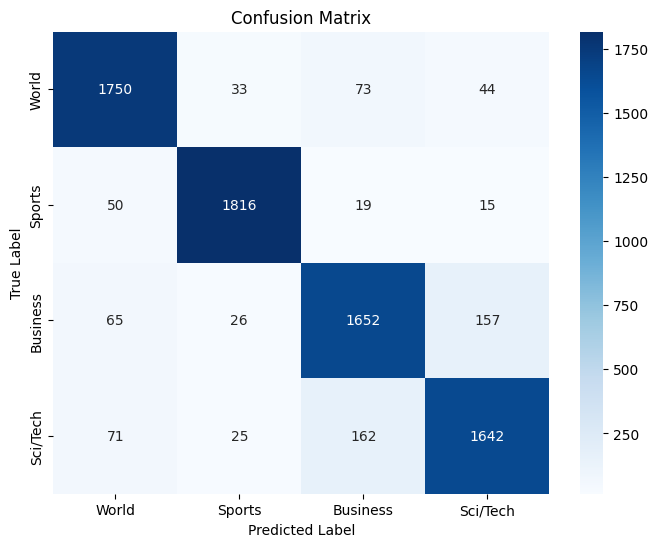

In [24]:
# Confusion Matrix
compute_confusion_matrix(rnn_model, test_loader)

## **Conclusion**

In this exercise, we successfully built and evaluated a text classification model using a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers. The model was trained on the AG_NEWS dataset, which contains news articles categorized into four classes: World, Sports, Business, and Sci/Tech.

Key Findings:

1. Model Performance:

 - The model achieved an impressive accuracy of 90.45% on the test set, demonstrating strong generalization capabilities for this text classification task.
 - This accuracy surpasses the target of 80%, indicating that the RNN with LSTM layers effectively captures the sequential and contextual information in text data.

2. Confusion Matrix Analysis:

 - The confusion matrix provides insights into how well the model distinguishes between the four classes.
 - Correctly Classified Samples: Each class has a high number of correctly classified samples along the diagonal, showing that the model performs well for each category.
 - Misclassifications:
    - The Business category had some misclassifications, with instances predicted as Sci/Tech. This may be due to overlapping terminology or themes between these two categories.
    - Sci/Tech articles also showed some misclassification as Business, likely for similar reasons, reflecting the model’s challenge in distinguishing nuances in tech-related business news.
 - Despite these minor misclassifications, the model’s high accuracy and relatively low misclassification counts across classes demonstrate its reliability.

3. Model Structure and Hyperparameters:
 - The use of an embedding layer allowed the model to convert words into dense vector representations, capturing semantic information.
 - The LSTM layer with 256 neurons and 2 layers enabled the model to learn temporal dependencies in the text sequences.
 - A fully connected layer mapped the learned representations to the four output classes, achieving the required classification.

4. Function Implementation:

 - Key functions such as accuracy, train, and compute_confusion_matrix were implemented to streamline model evaluation, training, and performance analysis.
 - The sample_text function provided additional insights by allowing for testing on individual samples, showing how the model interprets and predicts specific inputs.


This activity provided valuable hands-on experience in building, training, and evaluating a text classification model with RNNs in PyTorch. By using LSTM layers, we captured the contextual relationships in text data, which improved classification accuracy. The high accuracy achieved and detailed analysis through the confusion matrix indicate that the model effectively classifies news articles by category. Future improvements could include experimenting with more sophisticated architectures (e.g., bidirectional LSTMs or transformer models) or fine-tuning hyperparameters to further enhance performance.